In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans

# Load dataset

In [10]:
X_flares = pd.read_csv('../fulldata/Xtrain1h.csv').to_numpy()
y_flares = pd.read_csv('../fulldata/ytrain1h.csv')

# Inspect Marginal density

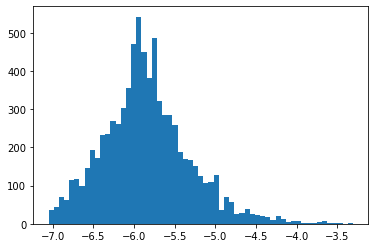

In [11]:
# marginal y
plt.hist(y_flares, bins='auto') 
plt.show()

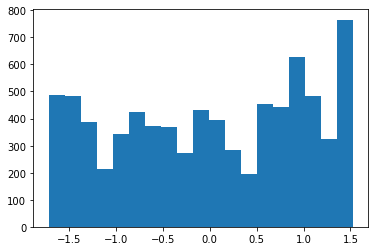

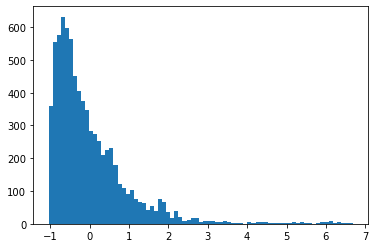

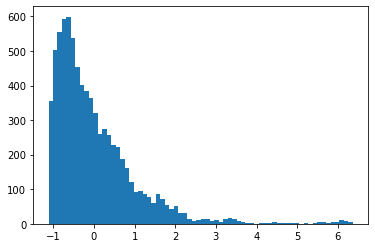

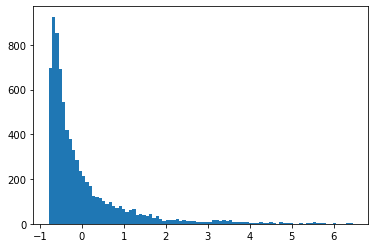

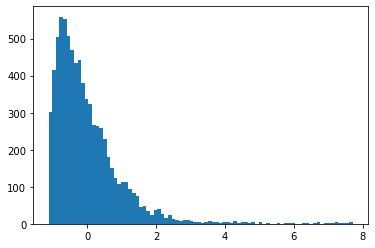

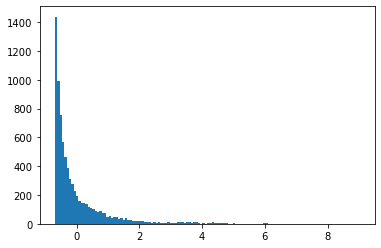

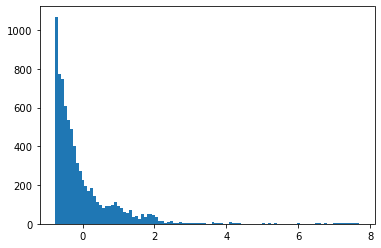

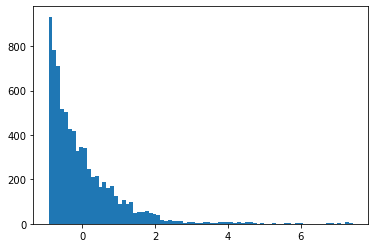

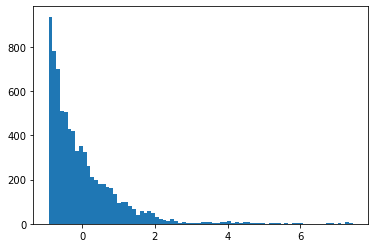

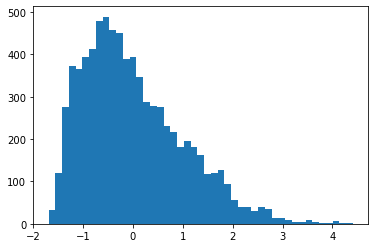

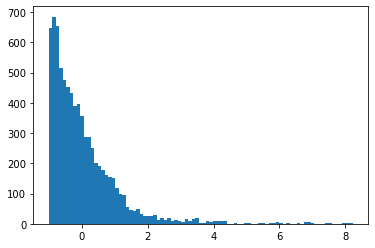

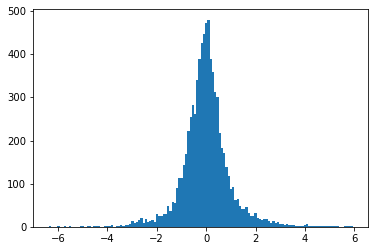

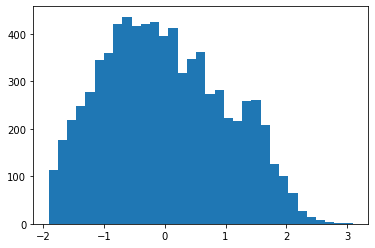

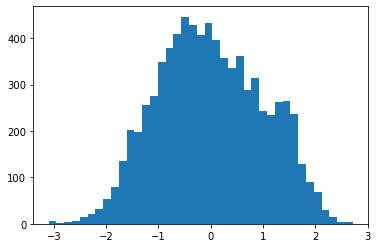

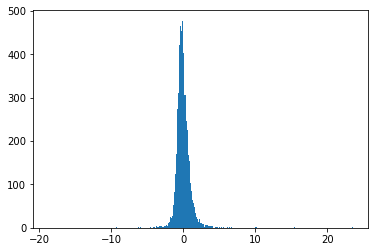

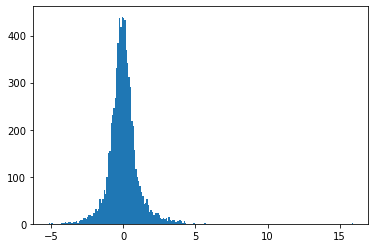

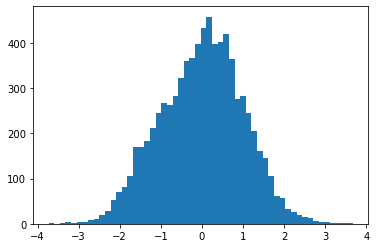

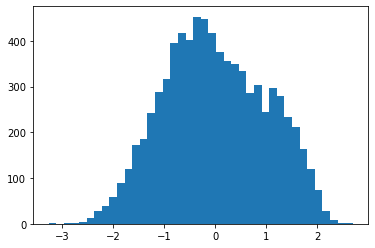

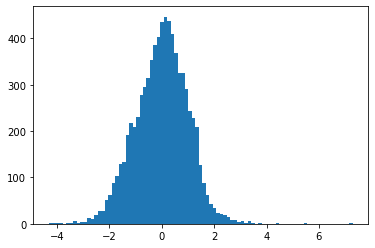

In [12]:
# marginal of covariates
for i in range(19):
    plt.hist(X_flares[:,i], bins='auto') 
    plt.show()

# Project the original dataset into a PCA-2 for visualization

In [13]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flares, y_flares, test_size=0.2, random_state=42)
X = X_train
X_tst = X_test
y = y_train
y_tst = y_test

In [14]:
pca = PCA(n_components=2)
pca.fit(X)
projected = pca.transform(X)
test_pca = pca.transform(X_tst)

Text(0, 0.5, 'component 2')

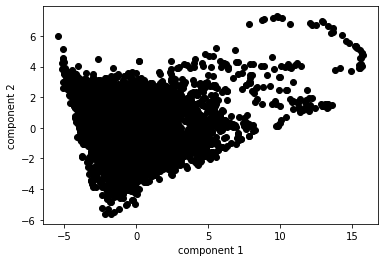

In [16]:
# Visualize train set
plt.scatter(projected[:, 0], projected[:, 1], c = y)
plt.xlabel('component 1')
plt.ylabel('component 2')

Text(0, 0.5, 'component 2')

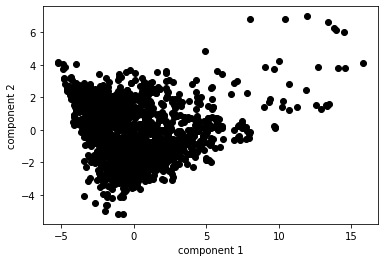

In [18]:
# Visualize test set
plt.scatter(test_pca[:, 0], test_pca[:, 1], c = y_tst)
plt.xlabel('component 1')
plt.ylabel('component 2')

# K-means to check for clustering structure of X

## K = 2

Score of kmean on test set: -24443.693952986214


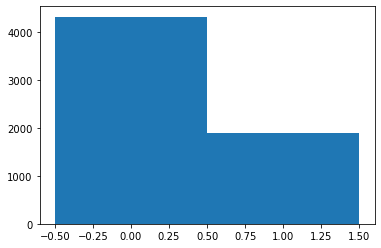

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
print("Score of kmean on test set: {}".format(kmeans.score(X_tst)))
y_kmeans = kmeans.predict(X)

d = np.diff(np.unique(y_kmeans)).min()
left_of_first_bin = y_kmeans.min() - float(d)/2
right_of_last_bin = y_kmeans.max() + float(d)/2
plt.hist(y_kmeans, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

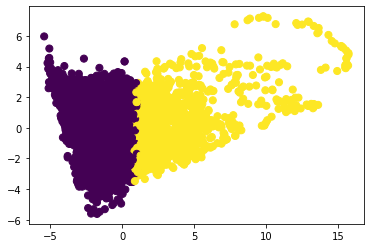

In [20]:
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')

## K = 5

Score of kmean on test set: -16871.103701584998


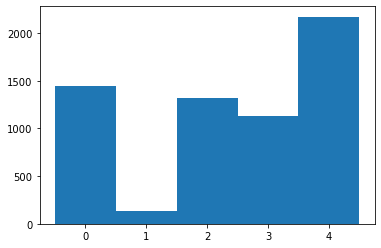

In [21]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
print("Score of kmean on test set: {}".format(kmeans.score(X_tst)))
y_kmeans = kmeans.predict(X)

d = np.diff(np.unique(y_kmeans)).min()
left_of_first_bin = y_kmeans.min() - float(d)/2
right_of_last_bin = y_kmeans.max() + float(d)/2
plt.hist(y_kmeans, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

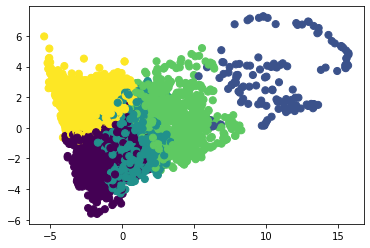

In [22]:
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')

## K = 10

Score of kmean on test set: -12235.421860987075


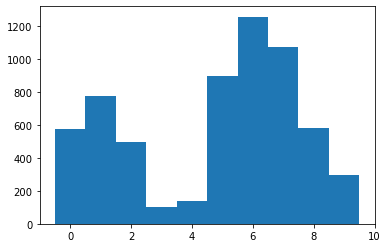

In [32]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
print("Score of kmean on test set: {}".format(kmeans.score(X_tst)))
y_kmeans = kmeans.predict(X)

d = np.diff(np.unique(y_kmeans)).min()
left_of_first_bin = y_kmeans.min() - float(d)/2
right_of_last_bin = y_kmeans.max() + float(d)/2
plt.hist(y_kmeans, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

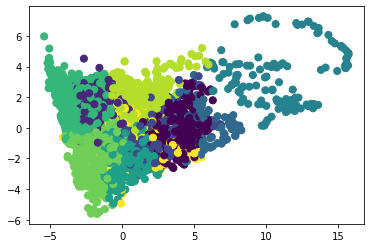

In [33]:
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')

## K = 20

Score of kmean on test set: -8982.858908490382


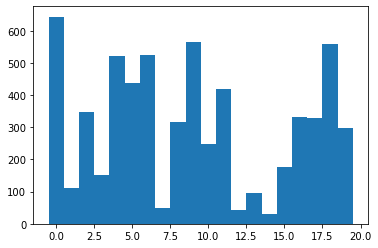

In [34]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(X)
print("Score of kmean on test set: {}".format(kmeans.score(X_tst)))
y_kmeans = kmeans.predict(X)

d = np.diff(np.unique(y_kmeans)).min()
left_of_first_bin = y_kmeans.min() - float(d)/2
right_of_last_bin = y_kmeans.max() + float(d)/2
plt.hist(y_kmeans, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

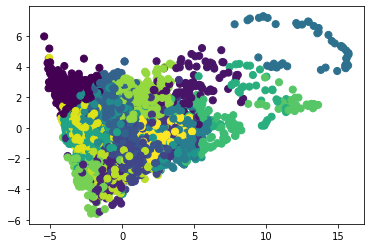

In [35]:
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')

## K = 30

Score of kmean on test set: -7563.489063622453


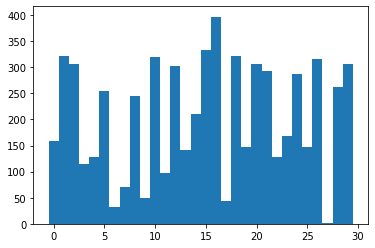

In [36]:
kmeans = KMeans(n_clusters=30)
kmeans.fit(X)
print("Score of kmean on test set: {}".format(kmeans.score(X_tst)))
y_kmeans = kmeans.predict(X)

d = np.diff(np.unique(y_kmeans)).min()
left_of_first_bin = y_kmeans.min() - float(d)/2
right_of_last_bin = y_kmeans.max() + float(d)/2
plt.hist(y_kmeans, np.arange(left_of_first_bin, right_of_last_bin + d, d))
plt.show()

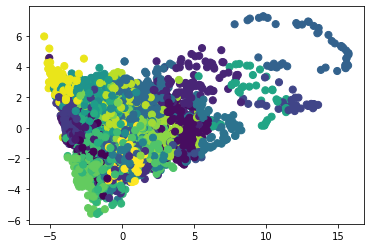

In [37]:
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Scikit-learn GMM on clustering structure of X

In [38]:
from sklearn.mixture import GaussianMixture

### K = 2

In [39]:
gmm2 = GaussianMixture(n_components=2).fit(X)

In [40]:
print("AIC score on train set is {}".format(gmm2.aic(X)))
print("BIC score on train set is {}".format(gmm2.bic(X)))
print("Test set log likelihood is {}".format(gmm2.score(X_tst)))

AIC score on train set is -24366.786880013045
BIC score on train set is -20966.48459828384
Test set log likelihood is 1.9109146574181515


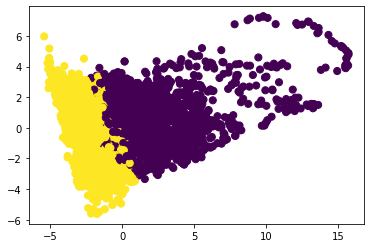

In [41]:
z = gmm2.predict(X)
plt.scatter(projected[:, 0], projected[:, 1], c=z, s=50, cmap='viridis')

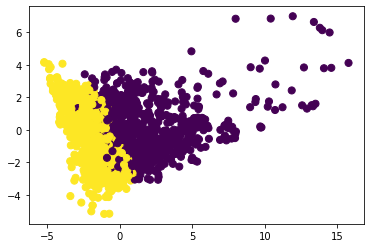

In [42]:
z = gmm2.predict(X_tst)
plt.scatter(test_pca[:, 0], test_pca[:, 1], c=z, s=50, cmap='viridis')

### K = 5

In [43]:
gmm5 = GaussianMixture(n_components=5).fit(X)

In [44]:
print("AIC score on train set is {}".format(gmm5.aic(X)))
print("BIC score on train set is {}".format(gmm5.bic(X)))
print("Test set log likelihood is {}".format(gmm5.score(X_tst)))

AIC score on train set is -77649.80037292802
BIC score on train set is -69138.94476083749
Test set log likelihood is 6.062400735136613


### K = 10

In [45]:
gmm10 = GaussianMixture(n_components=10).fit(X)

In [46]:
print("AIC score on train set is {}".format(gmm10.aic(X)))
print("BIC score on train set is {}".format(gmm10.bic(X)))
print("Test set log likelihood is {}".format(gmm10.score(X_tst)))

AIC score on train set is -119771.20111946038
BIC score on train set is -102742.75662343432
Test set log likelihood is 9.390041471639341


### K = 20

In [47]:
gmm20 = GaussianMixture(n_components=20).fit(X)

In [48]:
print("AIC score on train set is {}".format(gmm20.aic(X)))
print("BIC score on train set is {}".format(gmm20.bic(X)))
print("Test set log likelihood is {}".format(gmm20.score(X_tst)))

AIC score on train set is -151531.65064719657
BIC score on train set is -117468.02838329945
Test set log likelihood is 11.9352513493304


### K = 30

In [49]:
gmm30 = GaussianMixture(n_components=30).fit(X)

In [50]:
print("AIC score on train set is {}".format(gmm30.aic(X)))
print("BIC score on train set is {}".format(gmm30.bic(X)))
print("Test set log likelihood is {}".format(gmm30.score(X_tst)))

AIC score on train set is -166665.2238543402
BIC score on train set is -115566.42382257203
Test set log likelihood is 12.841697006682292
